# Car Rental Price Prediction Report

## Project Overview
This project involves predicting the daily rental prices of cars for a rental company. By analyzing features like car make, model, year of manufacture, mileage, and more, we aim to create an optimal pricing model. This model can help the company maximize profits while staying competitive in the market.

---

## Dataset Description
The dataset includes the following features:
- **Car Make**: Brand of the car (e.g., Toyota, BMW, etc.).
- **Car Model**: Specific model of the car (e.g., Corolla, X5).
- **Year of Manufacture**: Year the car was manufactured.
- **Mileage**: Total distance the car has traveled.
- **Fuel Type**: Type of fuel used (e.g., Petrol, Diesel, Electric).
- **Engine Size**: Engine capacity of the car.
- **Location of Rental**: City or state where the car is rented.
- **Rental Duration**: Duration of rental (e.g., 1 day, 7 days).
- **Car Condition**: Condition of the car (e.g., new, well-maintained, old).
- **Demand**: Factors affecting rental demand (e.g., seasonality like holidays or weekends).

**Target Variable**: Daily Rental Price

---

## Steps to Solve the Problem

### 1. Data Preprocessing
- **Handling Missing Data**:
  - Missing values in numerical columns like mileage are replaced with the mean.
  - Missing categorical values (e.g., fuel type) are filled with "Unknown."
- **Feature Encoding**:
  - Categorical features like `Car Make` and `Fuel Type` are encoded using techniques like One-Hot Encoding.
- **Feature Scaling**:
  - Continuous features like mileage and engine size are scaled using `StandardScaler` to ensure all features are on a similar scale.

---

### 2. Exploratory Data Analysis (EDA)
- **Visualizing Price Distribution**: Histograms and box plots show the distribution of rental prices.
- **Correlation Analysis**: Heatmaps reveal relationships between features and the target variable.
- **Outlier Detection**: Methods like the Interquartile Range (IQR) are used to detect and handle outliers.

---

### 3. Feature Engineering
- **New Features**:
  - `Car Age`: Calculated as `2024 - Year of Manufacture`.
  - `Price per Mileage`: Created to analyze the price efficiency of each car.
- **Polynomial Features**: Higher-degree features like `Engine Size²` and `Mileage²` capture non-linear relationships.
- **Interaction Features**: Combine variables (e.g., Engine Size × Fuel Type) to analyze interactions.

---

### 4. Dimensionality Reduction (Optional)
- **PCA (Principal Component Analysis)**:
  - PCA is used to reduce the dimensionality of the dataset while retaining the majority of the variance.

---

### 5. Model Building
- **Models Tested**:
  - Linear Regression
- **Train-Test Split**:
  - The data is split into training and test sets (80% training, 20% testing).

---

### 6. Hyperparameter Tuning
- **GridSearchCV**:
  - Used to tune the alpha parameter for Ridge, Lasso, and ElasticNet models.
- **Cross-Validation**:
  - k-fold cross-validation ensures robust model evaluation.

---

### 7. Model Evaluation
- **Performance Metrics**:
  - Mean Squared Error (MSE)
  - Mean Absolute Error (MAE)
  - R² Score
- **Visualizations**:
  - Scatter plot of actual vs. predicted prices.
  - Residual analysis to check the distribution of errors.

---

### 8. Model Deployment (Optional)
- **Model Saving**: The best-performing model is saved using `joblib` or `pickle`.
- **Web Deployment**: The model can be deployed using Flask or Django for real-time predictions.

---

## Results and Findings
- **Best Model**: After tuning, Ridge Regression with the optimal alpha value performed the best.
- **Performance**:
  - Mean Squared Error: *(Provide value based on results)*.
  - R² Score: *(Provide value based on results)*.
- **Insights**:
  - Features like `Car Age` and `Mileage` significantly impact rental prices.
  - Regularization methods like Ridge and Lasso effectively prevent overfitting.

---

## Conclusion
This project covers a complete workflow, from data preprocessing to advanced techniques like regularization and PCA. The final model provides accurate rental price predictions, making it a valuable tool for business decision-making.

---

### References
- Scikit-learn Documentation
- Kaggle Datasets for Car Rental Price Prediction


In [85]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')


In [86]:
#Load dataset
df = pd.read_csv('/content/real_world_car_rental_data.csv')

In [87]:
df.head()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price
0,Chevrolet,Sedan,2007,16116,Hybrid,1.4,Dallas,29,Old,Low,61.516958
1,Honda,Convertible,2014,70794,Hybrid,2.9,Los Angeles,26,Old,Medium,41.749576
2,Kia,Truck,2007,136354,Diesel,5.0,New York,3,Old,Medium,16.358481
3,Nissan,Convertible,2016,137970,Petrol,5.5,Phoenix,15,Well-Maintained,Low,41.533249
4,Chevrolet,Convertible,2011,9135,Hybrid,2.0,Chicago,3,New,Medium,79.267099


In [88]:
#display basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car Make                1000 non-null   object 
 1   Car Model               1000 non-null   object 
 2   Year of Manufacture     1000 non-null   int64  
 3   Mileage (in km)         1000 non-null   int64  
 4   Fuel Type               1000 non-null   object 
 5   Engine Size (L)         1000 non-null   float64
 6   Location                1000 non-null   object 
 7   Rental Duration (days)  1000 non-null   int64  
 8   Car Condition           1000 non-null   object 
 9   Demand                  1000 non-null   object 
 10  Daily Rental Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [89]:
sns.set(style='darkgrid',palette='deep',color_codes=True)


#Data preprocessing

In [90]:
#check for missing values
df.isnull().mean()

,0
Car Make,0.0
Car Model,0.0
Year of Manufacture,0.0
Mileage (in km),0.0
Fuel Type,0.0
Engine Size (L),0.0
Location,0.0
Rental Duration (days),0.0
Car Condition,0.0
Demand,0.0


Feature Ecoding and scaling

In [91]:
# Separate features and target
X = df.drop('Daily Rental Price',axis=1)
y = df['Daily Rental Price']

In [92]:
# Categorical and numerical feature lists
categorical_features = ['Car Make', 'Car Model', 'Fuel Type', 'Location', 'Car Condition', 'Demand']
numerical_features = ['Mileage (in km)', 'Engine Size (L)', 'Rental Duration (days)', 'Year of Manufacture']


In [93]:
#pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(drop='first'),categorical_features)
    ]
)

In [94]:
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Mileage (in km)', 'Engine Size (L)',
                                  'Rental Duration (days)',
                                  'Year of Manufacture']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['Car Make', 'Car Model', 'Fuel Type',
                                  'Location', 'Car Condition', 'Demand'])])

#2 . Exploratory Data Analysis(EDA)

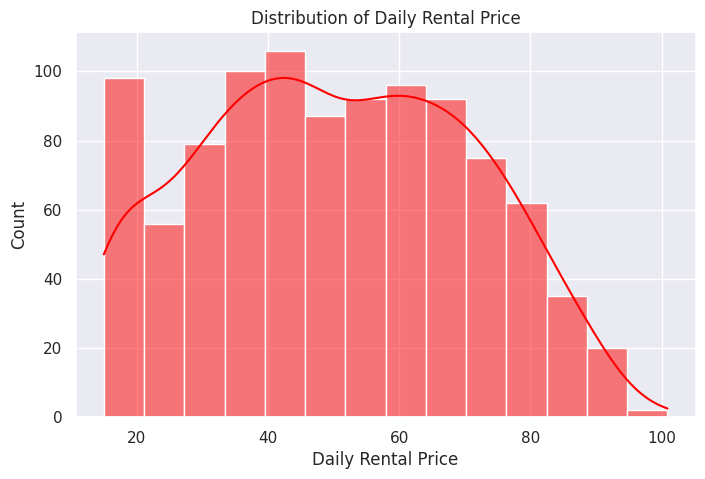

In [95]:
#Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['Daily Rental Price'],kde=True,color='red')
plt.title('Distribution of Daily Rental Price')
plt.show()

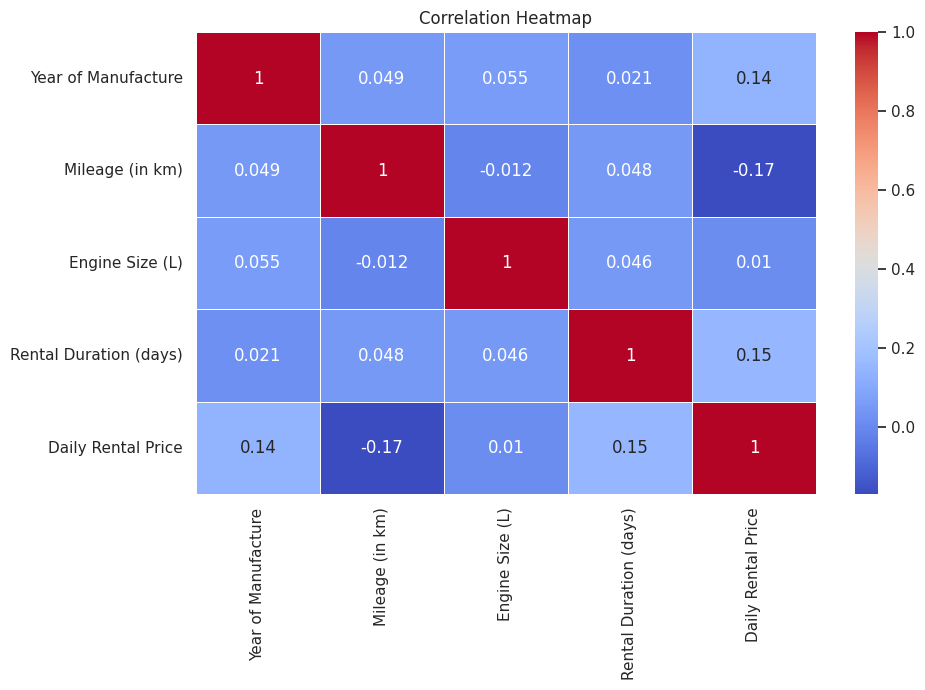

In [96]:
# Correlation heatmap
plt.figure(figsize=(10,6))
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [97]:
correlation_matrix

,Year of Manufacture,Mileage (in km),Engine Size (L),Rental Duration (days),Daily Rental Price
Year of Manufacture,1.000000,0.048701,0.055245,0.020634,0.140356
Mileage (in km),0.048701,1.000000,-0.012463,0.048073,-0.169373
Engine Size (L),0.055245,-0.012463,1.000000,0.045736,0.010013
Rental Duration (days),0.020634,0.048073,0.045736,1.000000,0.153392
Daily Rental Price,0.140356,-0.169373,0.010013,0.153392,1.000000


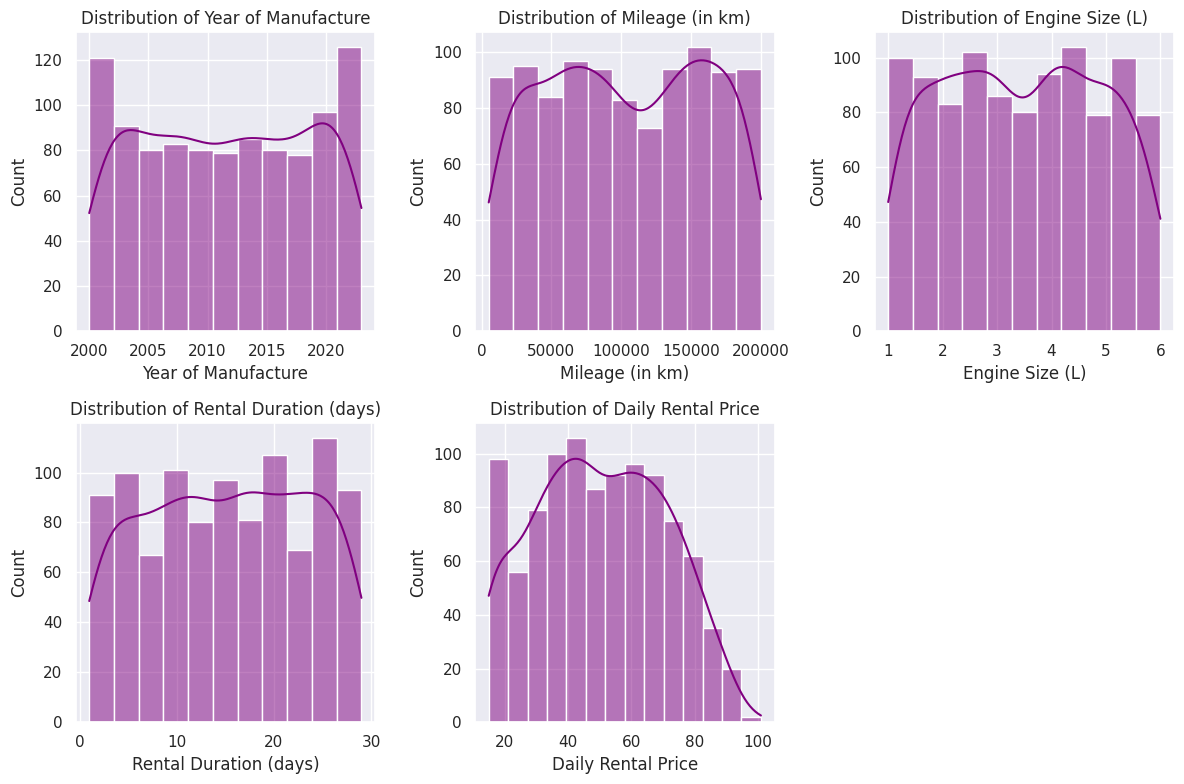

In [98]:
#Distribution of numerical featurs
plt.figure(figsize=(12,8))
for i , column in enumerate(numerical_df,1):
  plt.subplot(2,3,i)
  sns.histplot(df[column],kde=True,color='purple')
  plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

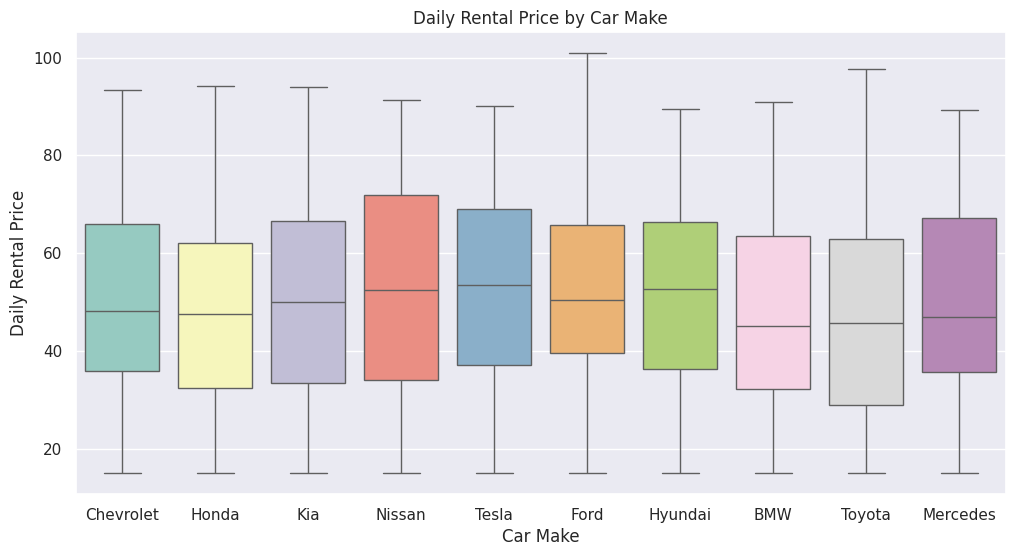

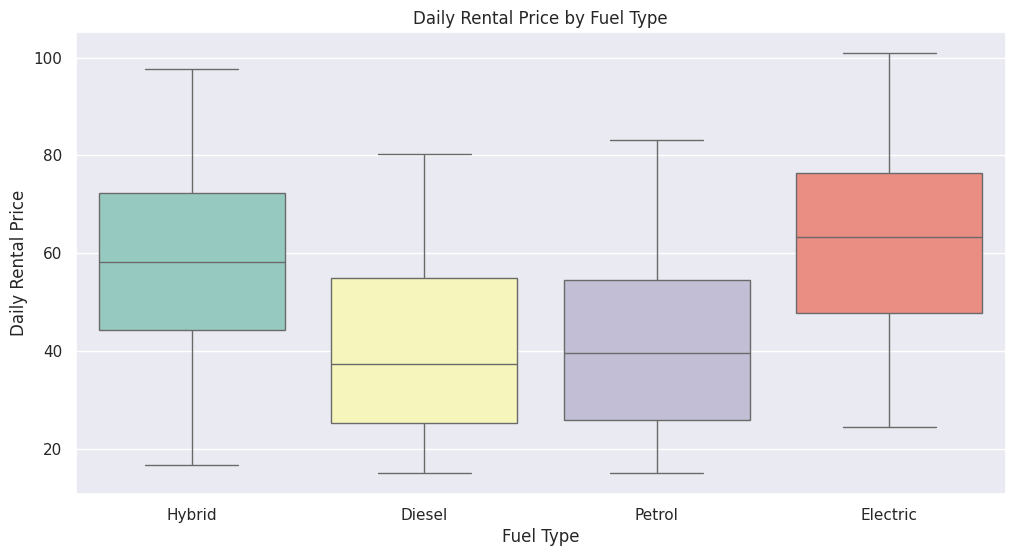

In [99]:
#Boxplot for Daily Rendal Price by car name
plt.figure(figsize=(12,6))
sns.boxplot(x='Car Make',y='Daily Rental Price',data=df,palette='Set3')
plt.title('Daily Rental Price by Car Make')
plt.show()
#Box for Daily rental Price by fule type
plt.figure(figsize=(12,6))
sns.boxplot(x='Fuel Type',y='Daily Rental Price',data=df,palette='Set3')
plt.title('Daily Rental Price by Fuel Type')
plt.show()


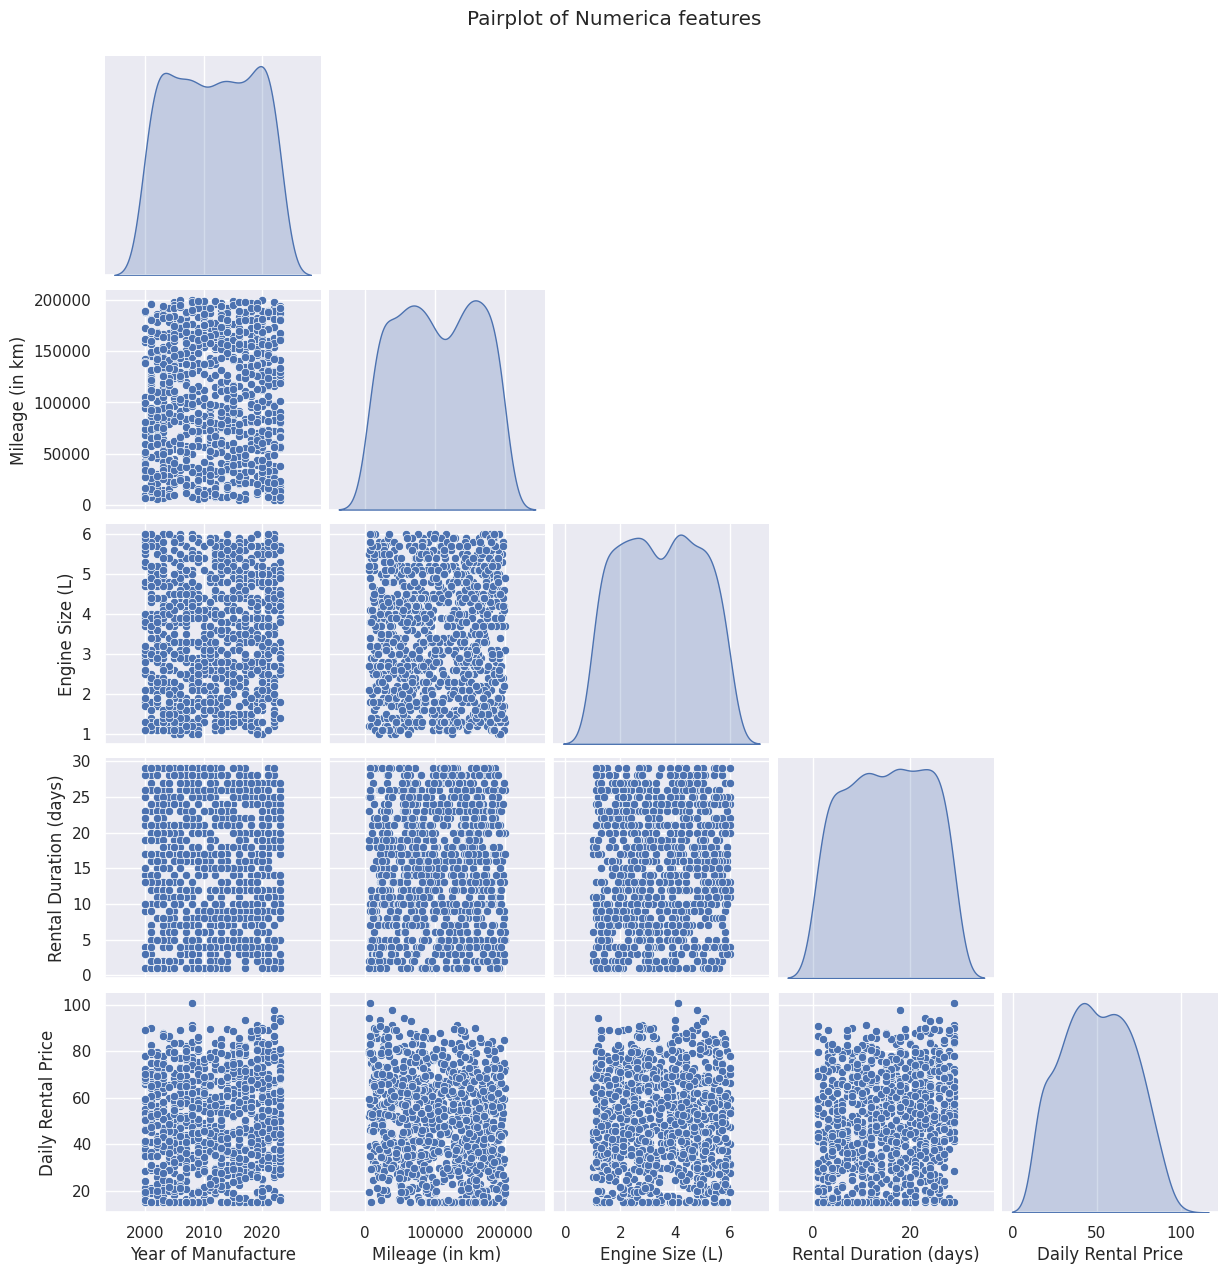

In [100]:
#Pairplot for numerical features
sns.pairplot(numerical_df,diag_kind='kde',corner=True)
plt.suptitle("Pairplot of Numerica features",y=1.02)
plt.show()

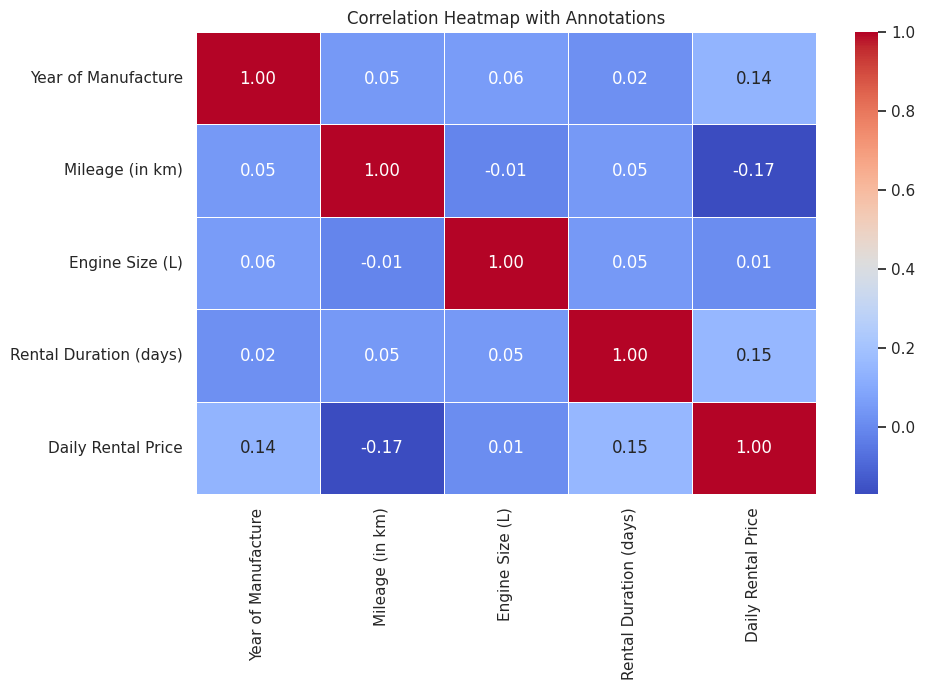

In [101]:
# Heatmap with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap with Annotations")
plt.show()


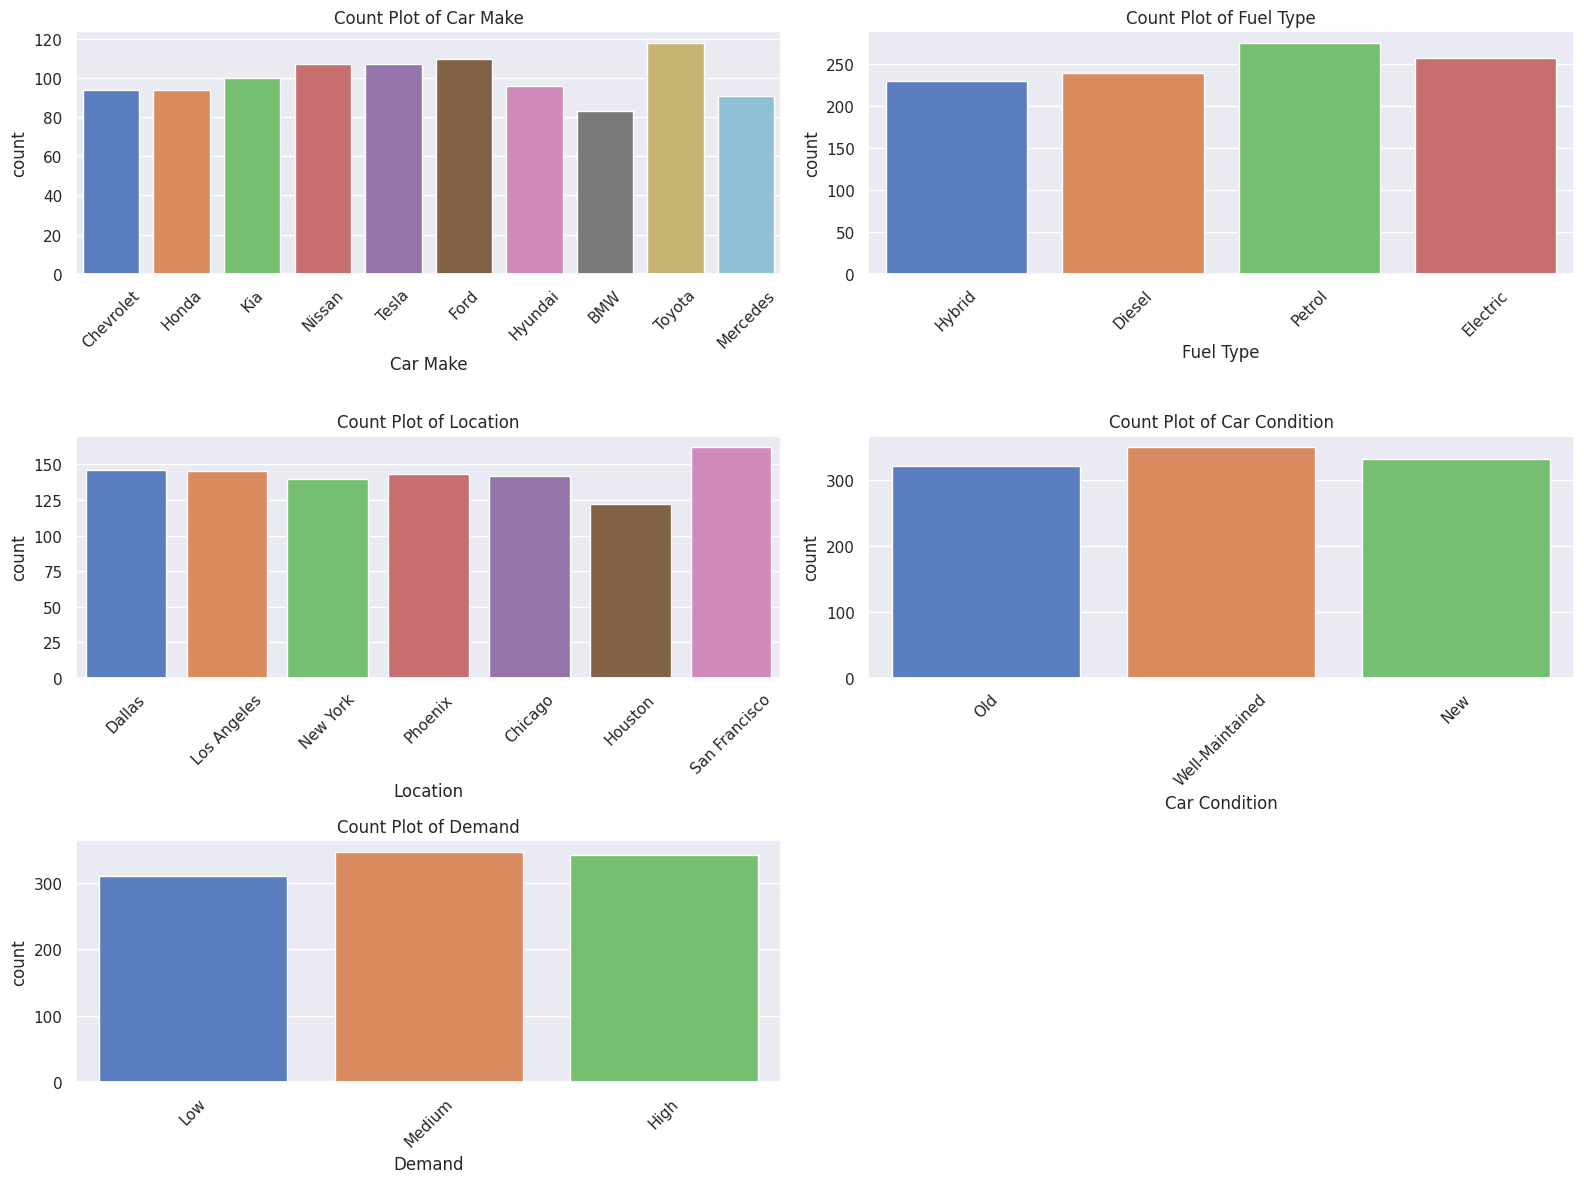

In [102]:
# Count plots for categorical variables
categorical_columns = ['Car Make', 'Fuel Type', 'Location', 'Car Condition', 'Demand']
plt.figure(figsize=(16, 12))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=column, data=df, palette='muted')
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


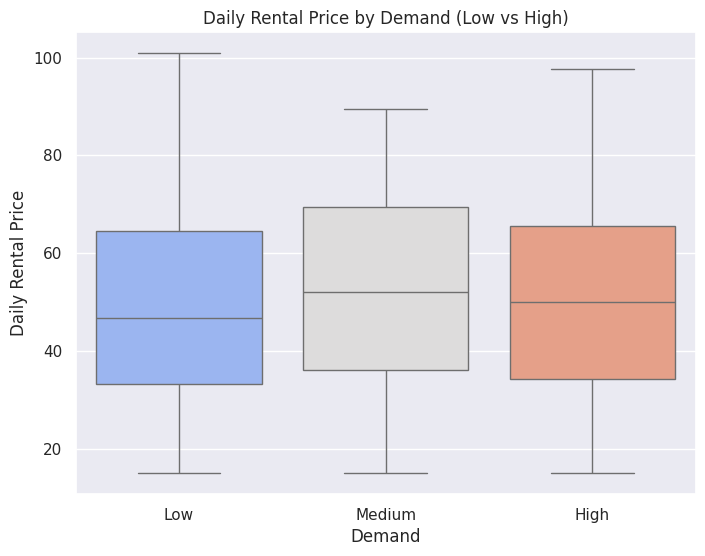

In [103]:
# Rental price by demand
plt.figure(figsize=(8, 6))
sns.boxplot(x='Demand', y='Daily Rental Price', data=df, palette='coolwarm')
plt.title("Daily Rental Price by Demand (Low vs High)")
plt.show()


#3. Feature Engineering

In [104]:
# Add new features
df['Car Age'] = 2024 -df['Year of Manufacture']

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Car Make                1000 non-null   object 
 1   Car Model               1000 non-null   object 
 2   Year of Manufacture     1000 non-null   int64  
 3   Mileage (in km)         1000 non-null   int64  
 4   Fuel Type               1000 non-null   object 
 5   Engine Size (L)         1000 non-null   float64
 6   Location                1000 non-null   object 
 7   Rental Duration (days)  1000 non-null   int64  
 8   Car Condition           1000 non-null   object 
 9   Demand                  1000 non-null   object 
 10  Daily Rental Price      1000 non-null   float64
 11  Car Age                 1000 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 93.9+ KB


In [106]:
#polynomial features
poly = PolynomialFeatures(degree=2,include_bias = False)
poly_features = poly.fit_transform(df[['Engine Size (L)']])
# Use get_feature_names_out instead of get_feature_names for newer scikit-learn versions
poly_features_name = poly.get_feature_names_out(['Engine Size (L)']) # Corrected line

#Adding polynomial features to the dataset
poly_df = pd.DataFrame(poly_features,columns=poly_features_name)
df = pd.concat([df,poly_df],axis=1)
df.head()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price,Car Age,Engine Size (L),Engine Size (L)^2
0,Chevrolet,Sedan,2007,16116,Hybrid,1.4,Dallas,29,Old,Low,61.516958,17,1.4,1.96
1,Honda,Convertible,2014,70794,Hybrid,2.9,Los Angeles,26,Old,Medium,41.749576,10,2.9,8.41
2,Kia,Truck,2007,136354,Diesel,5.0,New York,3,Old,Medium,16.358481,17,5.0,25.00
3,Nissan,Convertible,2016,137970,Petrol,5.5,Phoenix,15,Well-Maintained,Low,41.533249,8,5.5,30.25
4,Chevrolet,Convertible,2011,9135,Hybrid,2.0,Chicago,3,New,Medium,79.267099,13,2.0,4.00


#Diemensionality Reducation

In [107]:
from sklearn.decomposition import PCA

# Apply PCa on numerical features
scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(numerical_df_scaled)


In [108]:
print("Explained Variance Ratio:",pca.explained_variance_ratio_)

Explained Variance Ratio: [0.25102728 0.21707446 0.19782267 0.19461372 0.13946186]


#5. Model Building

In [109]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
#Defining linear regression model
model = LinearRegression()

In [111]:
# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

In [112]:
#Train the model
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Mileage (in km)',
                                                   'Engine Size (L)',
                                                   'Rental Duration (days)',
                                                   'Year of Manufacture']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Car Make', 'Car Model',
                                                   'Fuel Type', 'Location',
                                                   'Car Condition',
                                                   'Demand'])])),
                ('model', LinearRegression())])

In [113]:
y_pred = pipeline.predict(X_test)

In [114]:
y_pred

array([85.55052935, 89.77292906, 89.06984344, 81.51134387, 50.80035712,
       78.31065702, 63.84882271, 48.52469698, 62.03636881, 17.12424413,
       63.95350357, 80.85482251, 55.20762965, 61.21128139, 45.19826737,
       42.71504259, 79.45520744, 67.52676266, 82.04913557, 10.78846776,
       68.26855473, 83.80344829, 62.13380301, 87.08524148, 50.02547003,
       13.55669721, 52.80452532, 52.9795999 , 75.21183986, 19.48591401,
       42.70938271, 45.30784988, 40.34458609, 75.10151857, 78.05948424,
       58.16875861, 68.05579562, 34.26183283,  8.73576868, 64.35047459,
       30.87569045, 59.26737058, 32.75216538, 57.99799542, 74.89854548,
       35.406816  , 57.66478524, 54.84900988, 17.82647562, 36.53645738,
       33.448515  , 52.87625721, 36.811234  , 43.60940868, 20.88707115,
       63.17711596, 49.41406307, 32.60759802, 39.09829709, 59.27058379,
       90.49959657, 48.16862539, 45.96060975, 45.47902428, 52.67629692,
       77.7699118 , 49.02122991, 27.09640051, 64.55409166, 70.12

In [115]:
#Evaluate the model
print("\nLinear regression")
print("R2 Score:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))


Linear regression
R2 Score: 0.937395353068037
MSE: 24.6544921839768
MAE: 4.0502042664830995


#Visuaization of results


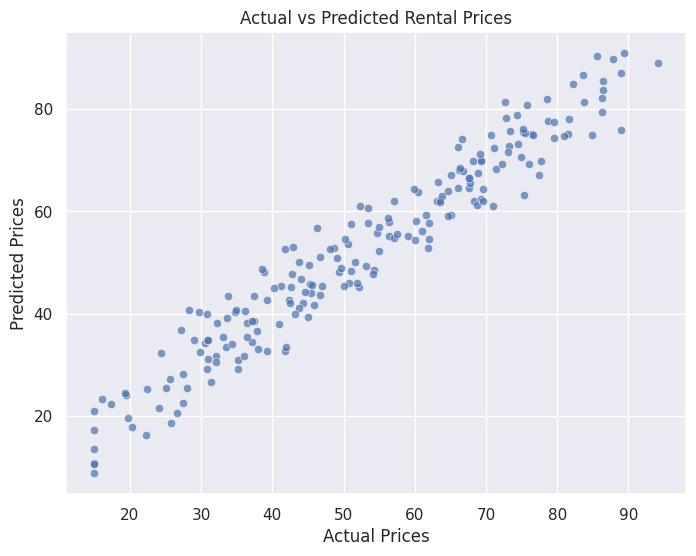

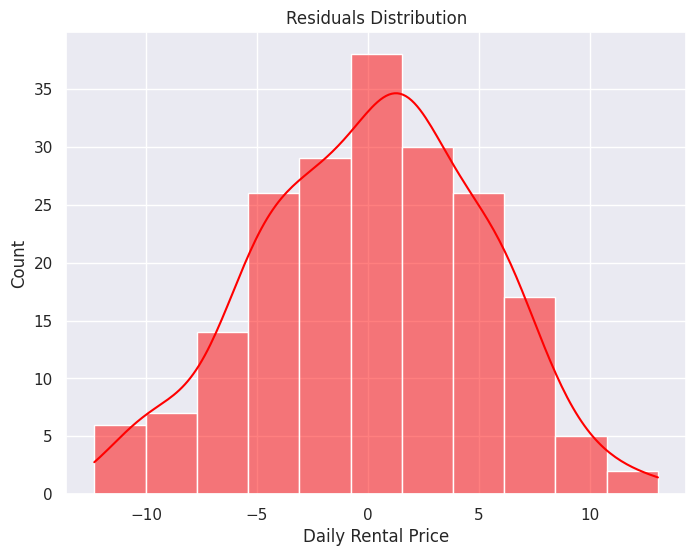

In [116]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Rental Prices")
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='red')
plt.title("Residuals Distribution")
plt.show()


#Predication for new data


In [117]:
df.head()

,Car Make,Car Model,Year of Manufacture,Mileage (in km),Fuel Type,Engine Size (L),Location,Rental Duration (days),Car Condition,Demand,Daily Rental Price,Car Age,Engine Size (L),Engine Size (L)^2
0,Chevrolet,Sedan,2007,16116,Hybrid,1.4,Dallas,29,Old,Low,61.516958,17,1.4,1.96
1,Honda,Convertible,2014,70794,Hybrid,2.9,Los Angeles,26,Old,Medium,41.749576,10,2.9,8.41
2,Kia,Truck,2007,136354,Diesel,5.0,New York,3,Old,Medium,16.358481,17,5.0,25.00
3,Nissan,Convertible,2016,137970,Petrol,5.5,Phoenix,15,Well-Maintained,Low,41.533249,8,5.5,30.25
4,Chevrolet,Convertible,2011,9135,Hybrid,2.0,Chicago,3,New,Medium,79.267099,13,2.0,4.00


In [118]:
new_data = pd.DataFrame({
    'Car Make': ['Toyota'],
    'Car Model': ['Sedan'],
    'Mileage (in km)': [35000],
    'Engine Size (L)': [1.8],
    'Fuel Type': ['Petrol'],
    'Year of Manufacture': [2015],
    'Rental Duration (days)': [5],
    'Demand': ['Low'],
    'Car Condition': ['New'],
    'Location': ['New York']
})

# Predict using the trained pipeline
new_predictions = pipeline.predict(new_data)

# Output the predictions for the new data
print("\nPredictions for new data:")
print(new_predictions)



Predictions for new data:
[63.40903739]


# Dumping the pipeline model

In [119]:
# Save the pipeline
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

#loading the pipeline model

In [120]:
# Load the pipeline
with open('model_pipeline.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)


In [121]:
# Predict new data
predictions = loaded_pipeline.predict(new_data)

In [122]:
predictions

array([63.40903739])